### 1. Introduction and Problem Statement
### 2. Data Collection and Requirement
### 3. Data Exploration and Cleaning
### 4. Feature Engineering
### 5. Model Building and Evaluation
### 6. Insights and Visualizations
### 7. Business Implications and Next Steps
### 8. Conclusion

### Introduction and Problem Statement
Stroke is a leading cause of death and disability globally, making early risk prediction essential for timely medical intervention and improved outcomes. This project aims to build a **binary classification model to predict** the probability of stroke based on various health and lifestyle features.

Accurate stroke prediction can support healthcare professionals in identifying high-risk individuals, prioritizing preventive care, and optimizing resources. This highlights the potential of machine learning to address critical healthcare challenges and improve patient outcomes.

dataset: https://www.kaggle.com/competitions/playground-series-s3e2/data

### 2. Data Collection and Requirement

In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier  # Models and ensemble method
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets using oversampling
import seaborn as sns  # Visualization library for heatmaps
import matplotlib.pyplot as plt  # Visualization library for plotting
import pandas as pd  # Data manipulation and analysis
import numpy as np

In [2]:
train_df=pd.read_csv(r"Dataset/train.csv")
test_df=pd.read_csv(r"Dataset/test.csv")

In [3]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
# Display basic information
print("Dataset Overview:")
print(f"Shape: {train_df.shape}\n")

Dataset Overview:
Shape: (15304, 12)



In [5]:
print("Data Info:")
train_df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
print("\nDescriptive Statistics:")
print(train_df.describe())


Descriptive Statistics:
                 id           age  hypertension  heart_disease  \
count  15304.000000  15304.000000  15304.000000   15304.000000   
mean    7651.500000     41.417708      0.049726       0.023327   
std     4418.028595     21.444673      0.217384       0.150946   
min        0.000000      0.080000      0.000000       0.000000   
25%     3825.750000     26.000000      0.000000       0.000000   
50%     7651.500000     43.000000      0.000000       0.000000   
75%    11477.250000     57.000000      0.000000       0.000000   
max    15303.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       15304.000000  15304.000000  15304.000000  
mean           89.039853     28.112721      0.041296  
std            25.476102      6.722315      0.198981  
min            55.220000     10.300000      0.000000  
25%            74.900000     23.500000      0.000000  
50%            85.120000     27.600000      0.0000

##### Shape of the Dataset:

15,304 rows and 12 columns.
##### Column Overview:

Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status.

Numerical Features: age, avg_glucose_level, bmi.

Binary Features: hypertension, heart_disease, stroke (target).

##### Descriptive Statistics:

age ranges from 1 to 82.0 years with a mean of 41.42 years.
    
avg_glucose_level ranges from 55.22 to 267.6 with a mean of 89.04.

bmi ranges from 10.3 to 80.1 with a mean of 28.11.

stroke target is imbalanced, as its mean (0.041) indicates ~4% positive cases.

## 3. Data Exploration and Cleaning
##### 3.1 Data Cleaning
##### 3.2 Exploratory Data Analysis

#### 3.1 Data Cleaning

In [7]:
# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


##### Missing Values:

No missing values in any column.

In [8]:
train_df['age']=train_df['age'].astype(int)
test_df['age']=test_df['age'].astype(int)

### =======================
### Exploratory Data Analysis (EDA)
##### 1. Univariat Analysis
       1.Numerical Feature
       2.Categorical Feature
##### 2. Bivariate Analysis
##### 3. Univariate Analysis
### =======================

#### 1. Univariat Analysis
       1.Numerical Feature
       2.Categorical Feature

In [9]:
# Set style for plots
sns.set(style="whitegrid")

In [10]:
# Numerical Features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

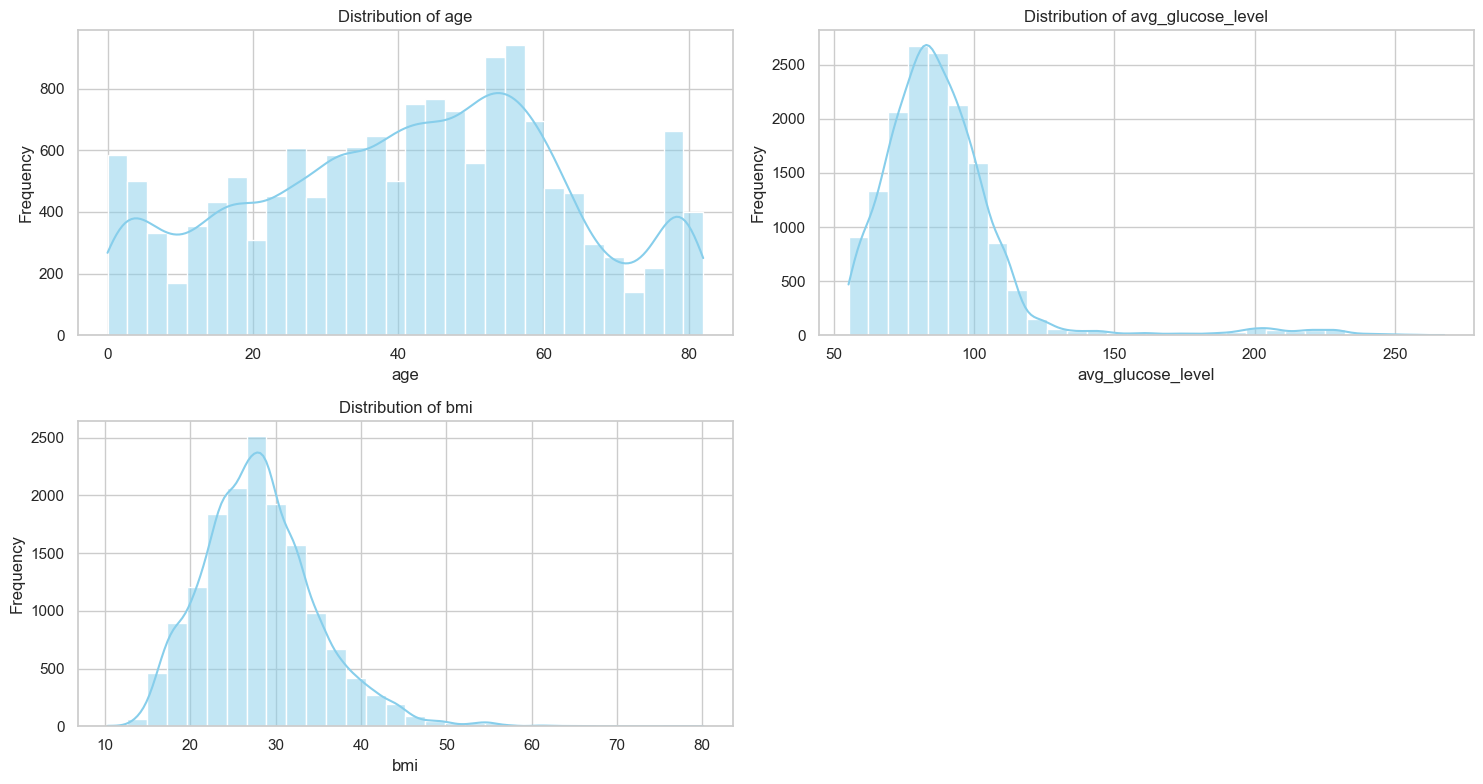

In [11]:
# Plot distributions of numerical features
def plot_numerical_distributions(data, columns):
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data[column], kde=True, color="skyblue", bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(train_df, numerical_features)

**Numerical Features vs. Stroke:**

Age:

Individuals with strokes are generally older, as evident from the higher median age in the stroke=1 group.
Stroke cases increase significantly with age.

Average Glucose Level:

Individuals with strokes tend to have higher average glucose levels.
Outliers are more frequent in the stroke=1 group, suggesting a strong relationship.

Right-skewed, with a few very high values (potential outliers).


BMI:

Stroke cases are slightly more prevalent in individuals with higher BMI values.
The relationship is less distinct compared to age and glucose level.

BMI: Nearly normal, but with a long tail toward higher values (outliers present).

In [12]:
# Categorical Features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# Target Variable
target = 'stroke'

In [13]:
train_df['stroke'].value_counts()

stroke
0    14672
1      632
Name: count, dtype: int64

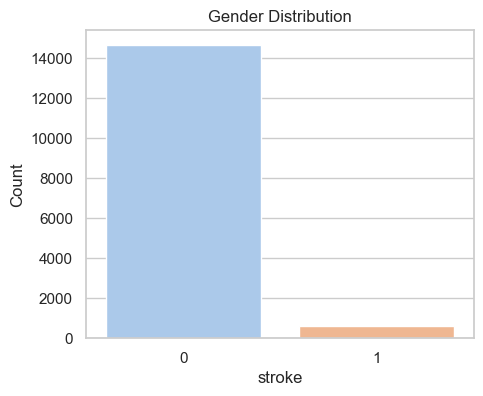

In [14]:
plt.figure(figsize=(5, 4))
sns.countplot(data=train_df, x='stroke', hue='stroke', palette='pastel', dodge=False, legend=False)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

In [15]:
train_df['gender'].drop(train_df[train_df['gender']=='Other'].index,inplace=True)
test_df['gender'].drop(test_df[test_df['gender']=='Other'].index,inplace=True)

In [16]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [17]:
train_df['ever_married'].value_counts()

ever_married
Yes    10385
No      4919
Name: count, dtype: int64

In [18]:
train_df['work_type'].value_counts()

work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64

In [19]:
train_df['Residence_type'].value_counts()

Residence_type
Rural    7664
Urban    7640
Name: count, dtype: int64

In [20]:
train_df['smoking_status'].value_counts()

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64

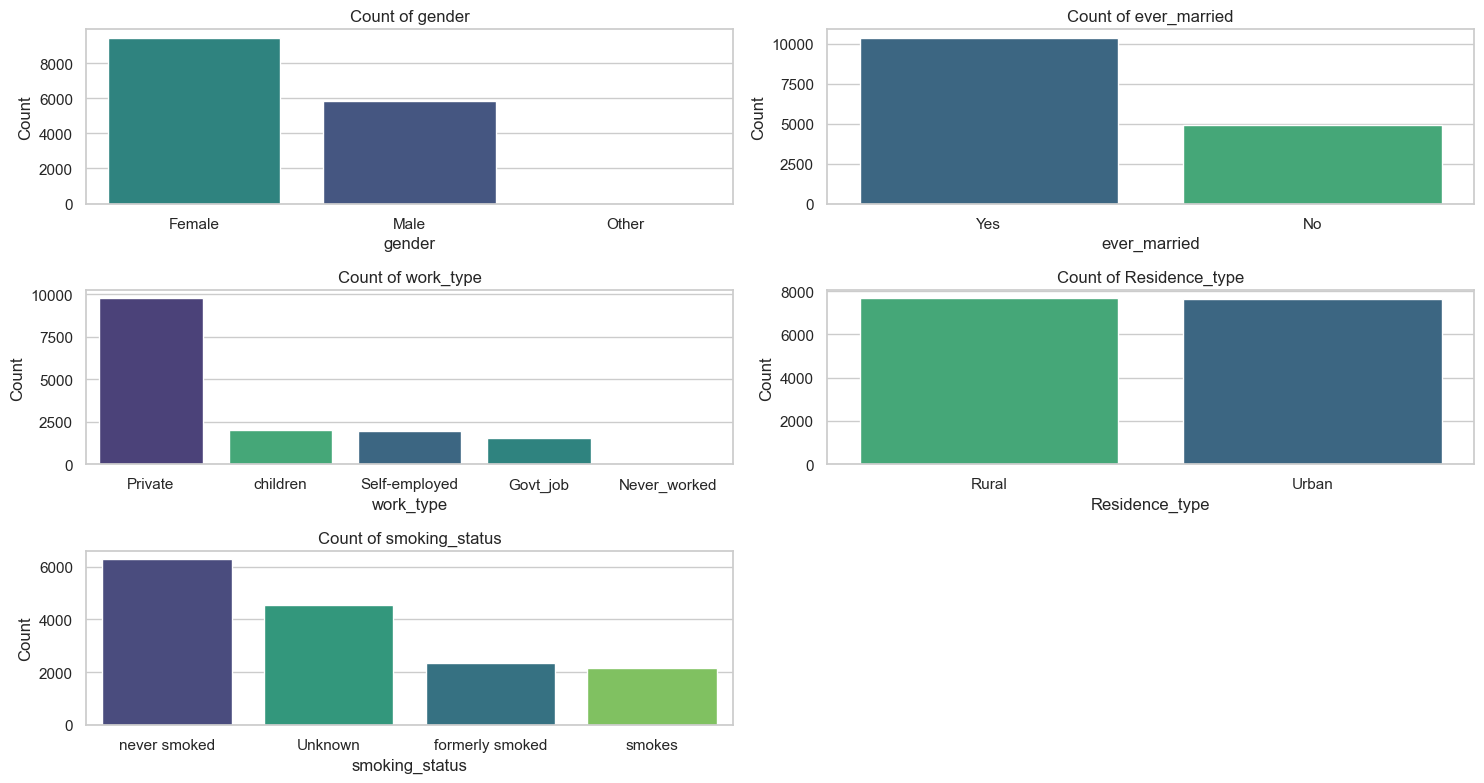

In [21]:
# Plot counts of categorical features
def plot_categorical_counts(data, columns):
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 2, i)
        sns.countplot(data=data, x=column,hue=column, palette="viridis", order=data[column].value_counts().index)
        plt.title(f"Count of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_categorical_counts(train_df, categorical_features)

Categorical Features vs. Stroke:

Gender:

Stroke cases are proportionally similar across genders but slightly higher among females.
    
Ever Married:

A larger proportion of stroke cases occur among those who are married.

Work Type:

Individuals working in the "Private" and "Self-employed" sectors have more stroke cases.
The "children" group has negligible stroke cases, likely due to their younger age.

Residence Type:

No significant difference in stroke occurrence between rural and urban areas.

Smoking Status:

Stroke cases are slightly more frequent among "Formerly Smoked" and "Smokes" categories.
A large "Unknown" category may limit the interpretability of this feature.

##### =======================
##### Bivariate Analysis
##### =======================

C:\Users\User\AppData\Local\Temp\ipykernel_1108\2311396013.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=data, palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_1108\2311396013.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=data, palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_1108\2311396013.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=data, palette="viridis")


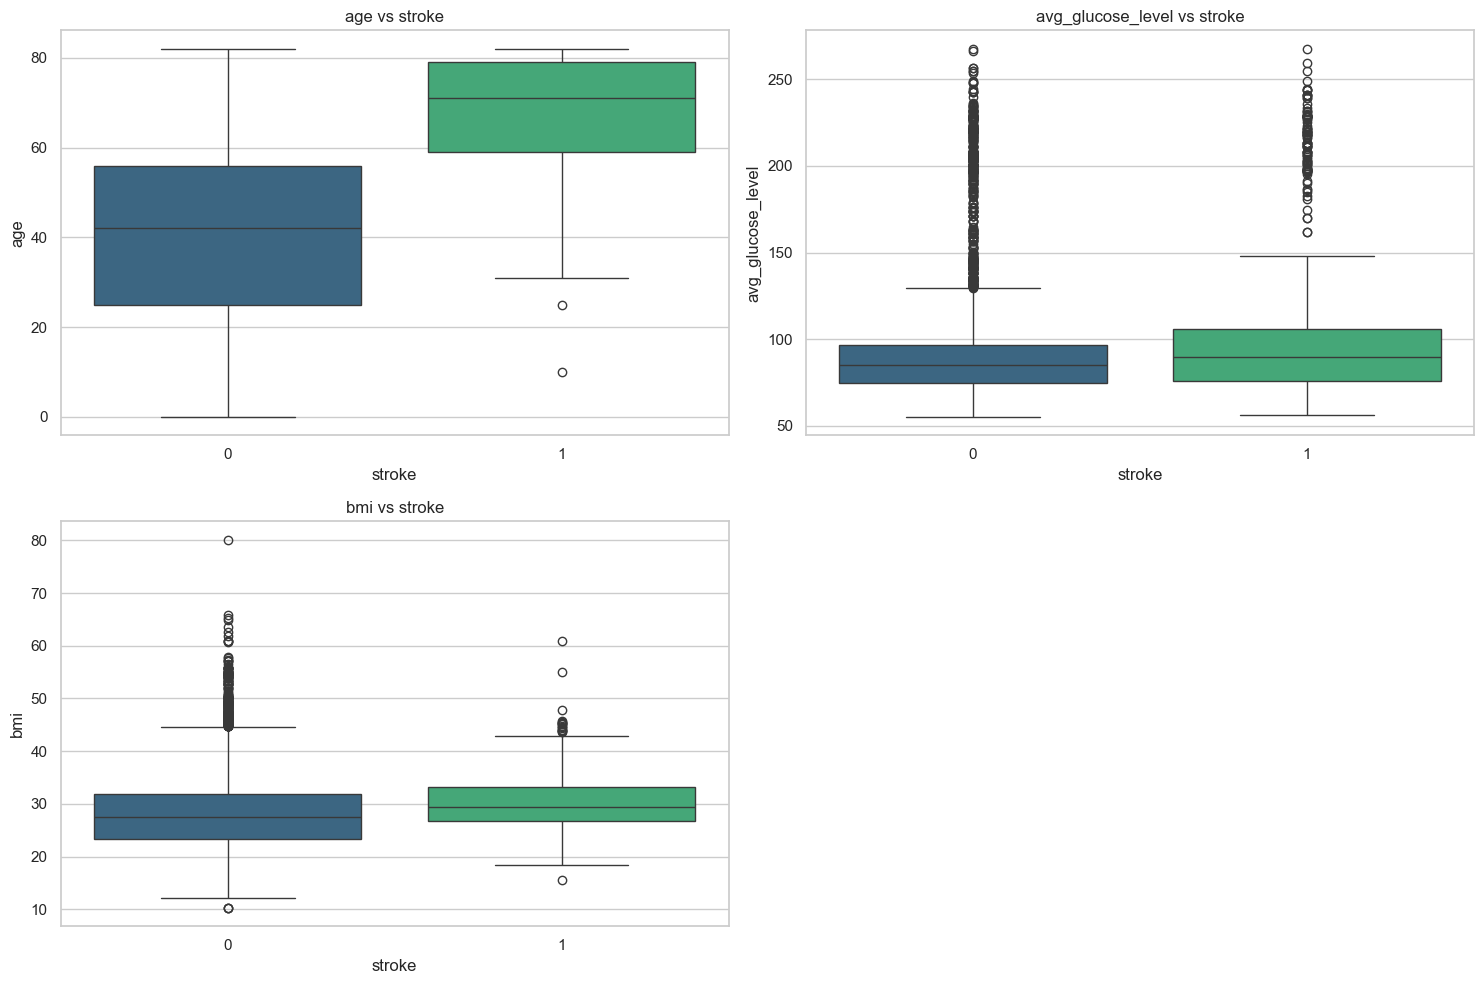

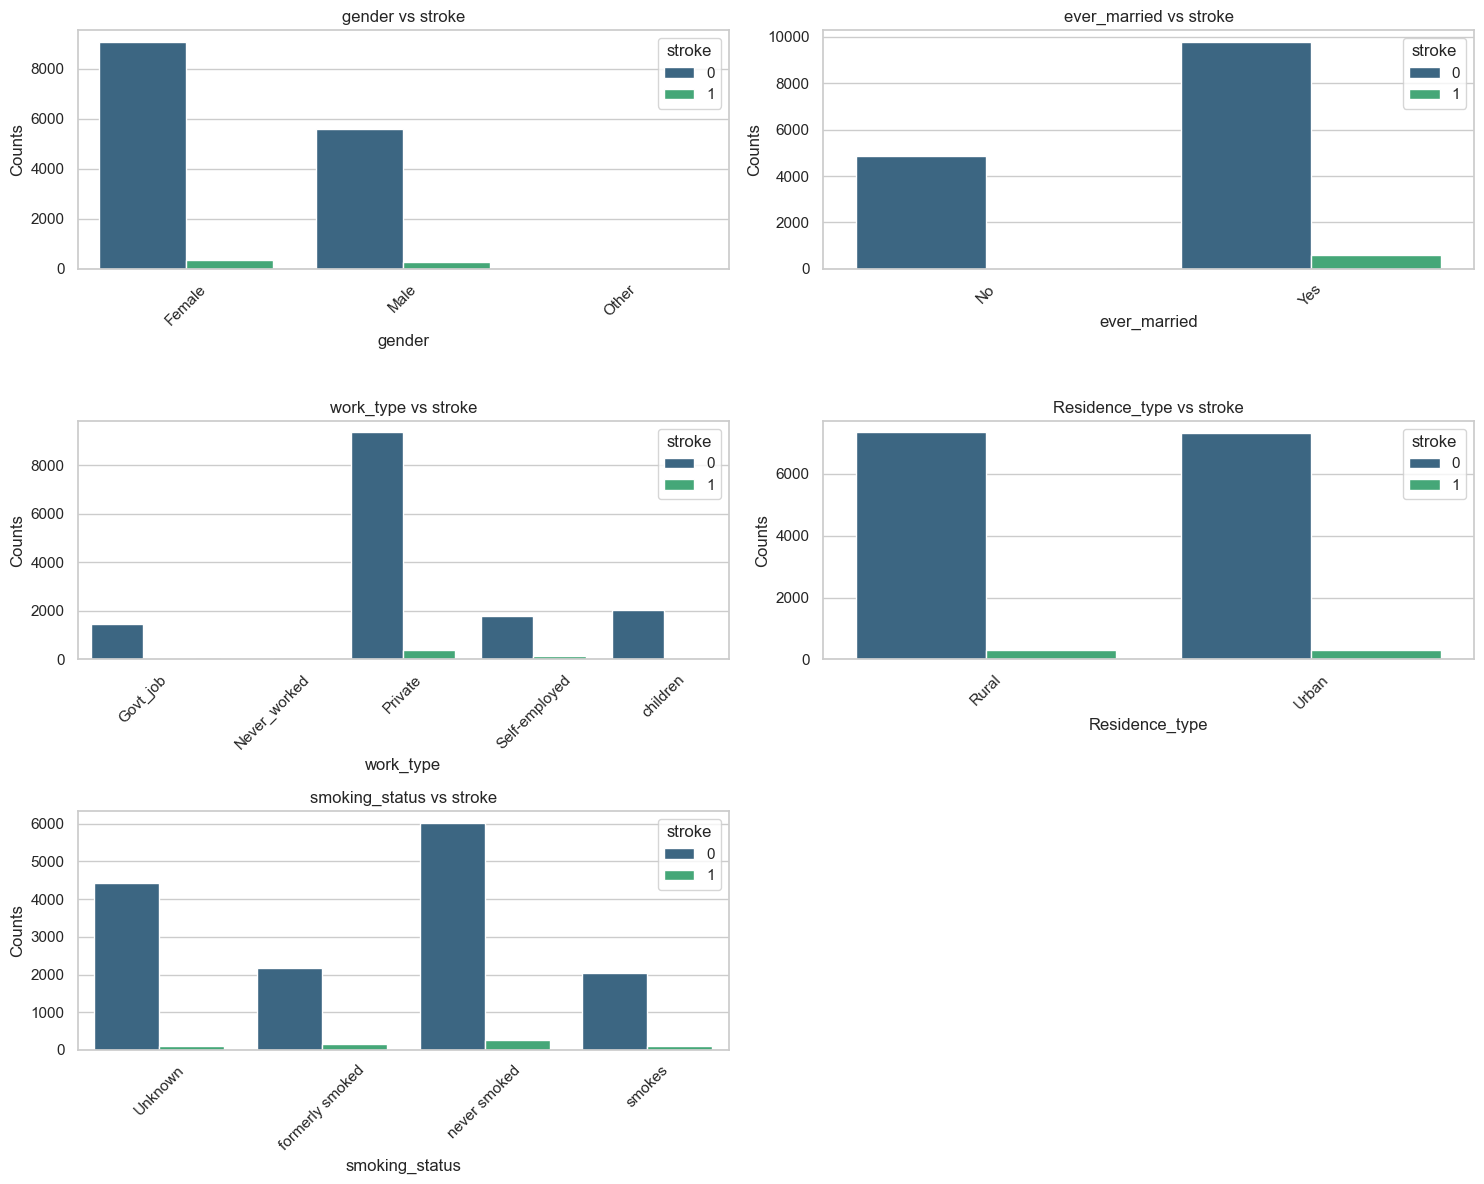

In [22]:
# Plot relationships between numerical features and the target
def plot_feature_vs_target(data, numerical_features, categorical_features, target):
    plt.figure(figsize=(15, 10))
    
    # Numerical Features vs Target
    for i, column in enumerate(numerical_features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=target, y=column, data=data, palette="viridis")
        plt.title(f"{column} vs {target}")
        plt.xlabel(target)
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

    # Categorical Features vs Target
    plt.figure(figsize=(15, 12))
    for i, column in enumerate(categorical_features, 1):
        plt.subplot(3, 2, i)
        data_grouped = data.groupby([column, target]).size().reset_index(name="counts")
        sns.barplot(x=column, y="counts", hue=target, data=data_grouped, palette="viridis")
        plt.title(f"{column} vs {target}")
        plt.xlabel(column)
        plt.ylabel("Counts")
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_feature_vs_target(train_df, numerical_features, categorical_features, target)

### 4. Feature Engineering

In [23]:
# Import libraries for encoding, pipelines, and configuration
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

# Set configuration to display sklearn pipelines visually (optional for debugging)
set_config(display="diagram")

# ========================
# Define Inputs and Outputs
# ========================
# Select columns excluding the target ('stroke') from the training dataset
input_cols = list(train_df.columns)[1:-1]  # Skip 'id' (1st column) and 'stroke' (last column)
target_col = 'stroke'  # Target variable

# Split data into features (X) and target (y)
X = train_df[input_cols].copy()  # Features for training
y = train_df[target_col].copy()  # Target for training

# Apply the same feature subset to the test dataset
Xtest = test_df[input_cols].copy()

# ========================
# Separate Numerical and Categorical Features
# ========================
# Identify numerical columns (e.g., 'age', 'bmi', 'avg_glucose_level')
numerical_col = X.select_dtypes(include=np.number).columns.to_list()

# Identify categorical columns (e.g., 'gender', 'work_type', etc.)
categorical_col = X.select_dtypes(include="object").columns.to_list()

# Remove 'smoking_status' for separate handling (since it has a defined order)
categorical_col.remove("smoking_status")

# ========================
# Define Encoders
# ========================
# OrdinalEncoder: Used for 'smoking_status' to encode its categories based on an order
ordinal_enc = OrdinalEncoder(categories=[['Unknown', 'never smoked', 'formerly smoked', 'smokes']])

# OneHotEncoder: Used for all other categorical variables (produces binary columns for each category)
onehot_enc = OneHotEncoder(handle_unknown='ignore')  # Ignores unseen categories in test data

# ========================
# Build Column Transformer
# ========================
# Create a preprocessing pipeline using ColumnTransformer:
# - Ordinal encode 'smoking_status'
# - One-hot encode remaining categorical columns
preprocessor = ColumnTransformer([
    ("Ordinal_Encoder", ordinal_enc, ["smoking_status"]),  # Ordinal encoding for 'smoking_status'
    ("Onehot_Encoder", onehot_enc, categorical_col)       # One-hot encoding for other categorical features
])

# ========================
# Fit Preprocessor on Training Data
# ========================
preprocessor.fit(X)  # Fit the transformer on the training data

# Get encoded column names after transformation
encoded_cols = list(preprocessor.get_feature_names_out())  # New feature names (after encoding)

# ========================
# Transform Training and Test Data
# ========================
# Add transformed columns (encoded features) to the training dataset
X[encoded_cols] = preprocessor.transform(X)

# Add transformed columns to the test dataset
Xtest[encoded_cols] = preprocessor.transform(Xtest)

# ========================
# Prepare Final Feature Matrix
# ========================
# Combine numerical and encoded categorical columns for training
X_train = X[numerical_col + encoded_cols]

# Extract the target column ('stroke')
y_train = train_df[target_col]  # Note: This seems incorrect; it should be `y_train = y`

# Prepare test features in the same format as the training data
X_test = Xtest[numerical_col + encoded_cols]

In [24]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encoder__smoking_status,Onehot_Encoder__gender_Female,Onehot_Encoder__gender_Male,Onehot_Encoder__gender_Other,Onehot_Encoder__ever_married_No,Onehot_Encoder__ever_married_Yes,Onehot_Encoder__work_type_Govt_job,Onehot_Encoder__work_type_Never_worked,Onehot_Encoder__work_type_Private,Onehot_Encoder__work_type_Self-employed,Onehot_Encoder__work_type_children,Onehot_Encoder__Residence_type_Rural,Onehot_Encoder__Residence_type_Urban
0,28,0,0,79.53,31.1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33,0,0,78.44,23.9,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42,0,0,103.00,40.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,0,0,64.87,28.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24,0,0,73.36,28.8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
X_train.shape[1]==X_test.shape[1]

True

In [26]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier  # Models and ensemble method
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets using oversampling
import seaborn as sns  # Visualization library for heatmaps
import matplotlib.pyplot as plt  # Visualization library for plotting
import pandas as pd  # Data manipulation and analysis

In [27]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("\nClass Distribution after SMOTE:")
print(y_train_smote.value_counts())

# =======================
# Final Dataset Overview
# =======================

# Display the shape of the processed dataset
print("\nFinal Processed Dataset Shapes:")
print(f"X_train: {X_train_smote.shape}, y_train: {y_train_smote.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Class Distribution after SMOTE:
stroke
0    11737
1    11737
Name: count, dtype: int64

Final Processed Dataset Shapes:
X_train: (23474, 18), y_train: (23474,)
X_test: (3061, 18), y_test: (3061,)


In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
}

In [29]:
# Function to evaluate a model on performance metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Trains the model, predicts on test data, and computes evaluation metrics.
    Returns the confusion matrix and other metrics.
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict test labels
    
    # Compute metrics
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return confusion_mat, accuracy, precision, recall, f1


In [30]:
# Function to store model performance as a DataFrame
def metric_df(model, model_name):
    """
    Evaluates a model and stores metrics in a DataFrame for better comparison.
    Also saves the confusion matrix for heatmap plotting later.
    """
    confusion_mat, accuracy, precision, recall, f1 = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    
    # Store confusion matrix for visualization
    confusion_mats[model_name] = confusion_mat
    
    # Create DataFrame for metrics
    model_metrics = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1]
    })
    return model_metrics

In [31]:
# Dictionary to store confusion matrices for all models
confusion_mats = {}

# Store all model evaluation results in a list
predictions = []

# Evaluate each model in the `models` dictionary
for model_name, model in models.items():
    model_metrics = metric_df(model, model_name)  # Get metrics
    predictions.append(model_metrics)  # Append metrics to the list

# Combine all metrics into a single DataFrame for easy comparison
predictions_df = pd.concat(predictions, ignore_index=True)
print(predictions_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  Accuracy  Precision    Recall        F1
0           Logistic Regression  0.783731   0.133880  0.777778  0.228438
1                 Random Forest  0.954263   0.333333  0.111111  0.166667
2             Gradient Boosting  0.944136   0.285714  0.238095  0.259740
3                 Decision Tree  0.924861   0.190476  0.253968  0.217687
4  Support Vector Machine (SVM)  0.727213   0.120043  0.888889  0.211520
5     K-Nearest Neighbors (KNN)  0.826527   0.142857  0.642857  0.233766
6                   Naive Bayes  0.353806   0.055662  0.920635  0.104977
7                       XGBoost  0.953283   0.373134  0.198413  0.259067


In [33]:
# Voting Classifier: Hard Voting
voting_estimators = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Support Vector Machine (SVM)", SVC(probability=True, random_state=42)),
]

# Hard Voting Classifier
VC_hard = VotingClassifier(estimators=voting_estimators, voting='hard')
hard_metrics = metric_df(VC_hard, "Voting Classifier (Hard)")
predictions.append(hard_metrics)

# Soft Voting Classifier
VC_soft = VotingClassifier(estimators=voting_estimators, voting='soft')
soft_metrics = metric_df(VC_soft, "Voting Classifier (Soft)")
predictions.append(soft_metrics)

# Print metrics for the voting classifiers
print(hard_metrics)
print(soft_metrics)

# Final combined DataFrame of all metrics
final_predictions_df = pd.concat(predictions, ignore_index=True)
print("\nModel Comparison:")
print(final_predictions_df.sort_values(by="Recall", ascending=False))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

                      Model  Accuracy  Precision    Recall        F1
0  Voting Classifier (Hard)  0.786018   0.134163  0.769841  0.228504
                      Model  Accuracy  Precision    Recall        F1
0  Voting Classifier (Soft)   0.86671   0.183857  0.650794  0.286713

Model Comparison:
                          Model  Accuracy  Precision    Recall        F1
6                   Naive Bayes  0.353806   0.055662  0.920635  0.104977
4  Support Vector Machine (SVM)  0.727213   0.120043  0.888889  0.211520
0           Logistic Regression  0.783731   0.133880  0.777778  0.228438
8      Voting Classifier (Hard)  0.786018   0.134163  0.769841  0.228504
9      Voting Classifier (Soft)  0.866710   0.183857  0.650794  0.286713
5     K-Nearest Neighbors (KNN)  0.826527   0.142857  0.642857  0.233766
3                 Decision Tree  0.924861   0.190476  0.253968  0.217687
2             Gradient Boosting  0.944136   0.285714  0.238095  0.259740
7                       XGBoost  0.953283   0.37

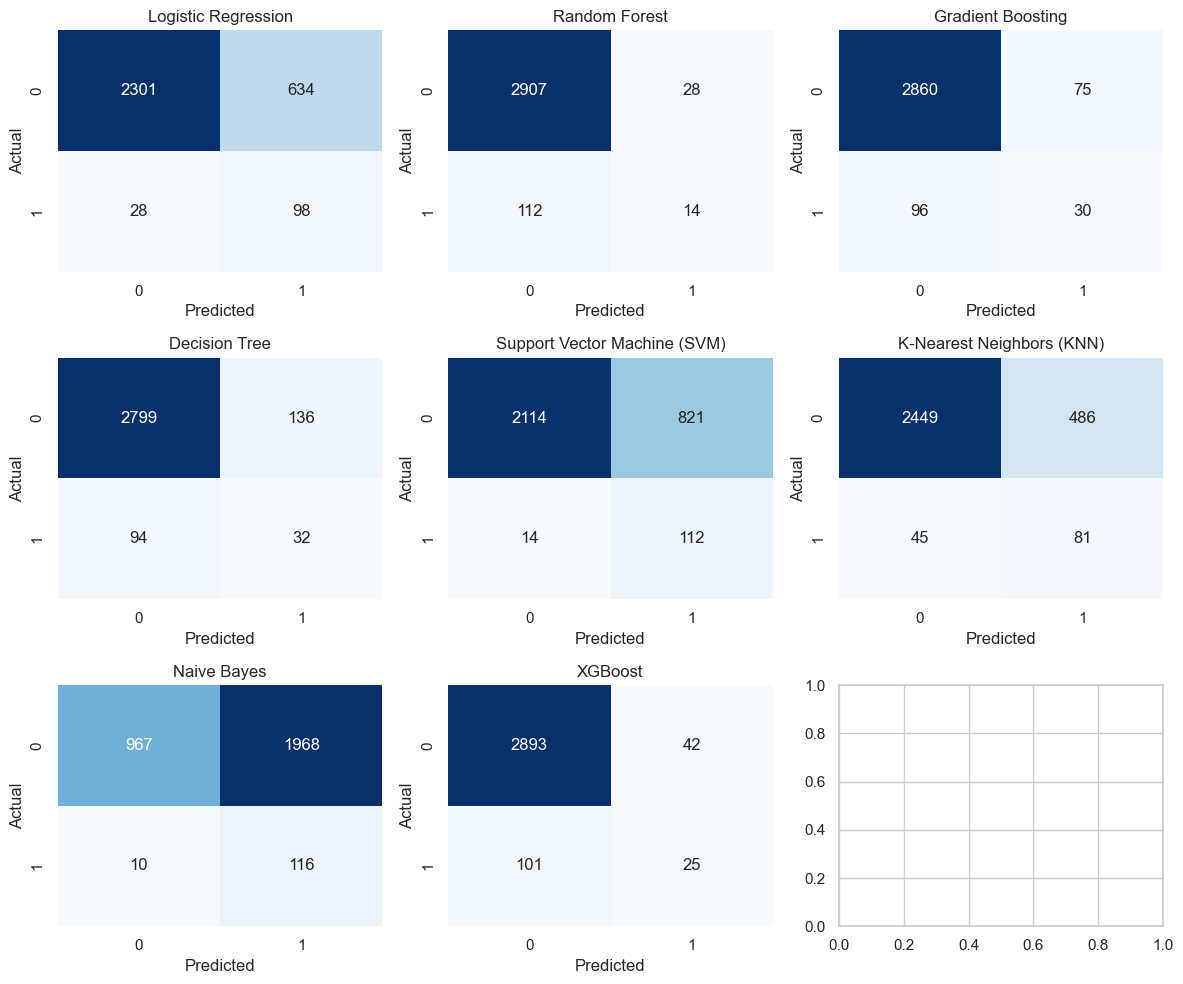

In [32]:
# Plot confusion matrices as heatmaps
models_to_plot = [
    "Logistic Regression", 
    "Random Forest", 
    "Gradient Boosting", 
    "Decision Tree",
    "Support Vector Machine (SVM)",
    "K-Nearest Neighbors (KNN)",
    "Naive Bayes",
    "XGBoost",
]

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    if model_name in confusion_mats:  # Ensure the model has a confusion matrix
        confusion_mat = confusion_mats[model_name]
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
        ax.set_title(f"{model_name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    else:
        ax.axis('off')  # Hide unused subplot areas

plt.tight_layout()
plt.show()

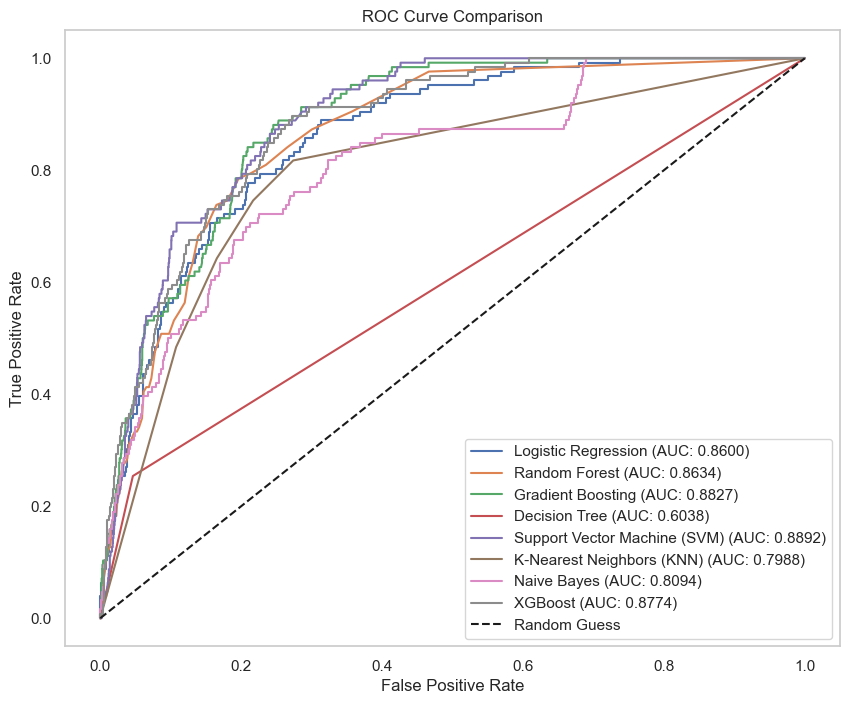

                          Model   ROC-AUC
4  Support Vector Machine (SVM)  0.889157
2             Gradient Boosting  0.882675
7                       XGBoost  0.877402
1                 Random Forest  0.863357
0           Logistic Regression  0.859982
6                   Naive Bayes  0.809418
5     K-Nearest Neighbors (KNN)  0.798814
3                 Decision Tree  0.603815


In [34]:
# ===================
# Combined ROC Curve
# ===================
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize a dictionary to store ROC details
results = {}

# Calculate and store ROC Curve details for each model
for model_name, model in models.items():
    # Get predicted probabilities for the positive class (1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate, True Positive Rate, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store in results
    results[model_name] = {"fpr": fpr, "tpr": tpr, "roc_auc": roc_auc}

# Plot the ROC curves for all models
plt.figure(figsize=(10, 8))

for model_name, result in results.items():
    plt.plot(result["fpr"], result["tpr"], label=f"{model_name} (AUC: {result['roc_auc']:.4f})")

# Add a random guess baseline
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# ===================
# Compare Scores
# ===================
# Create a summary table of AUC scores
summary_table = pd.DataFrame(
    {"Model": list(results.keys()), 
     "ROC-AUC": [result["roc_auc"] for result in results.values()]}
).sort_values(by="ROC-AUC", ascending=False)

# Display the summary table
print(summary_table)